<a href="https://colab.research.google.com/github/2303A51553/Natural-language-process/blob/main/B09_2303A51553_nlp5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('/content/tweets.csv.zip')

In [ ]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from string import punctuation
import nltk
import string
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')
stop_words = set(stopwords.words('english'))
def preprocess_text(text):
    text=text.lower()
    text=text.translate(str.maketrans('', '', string.punctuation)) # Remove punctuation
    text=re.sub(r'[^a-zA-Z0-9\s]', '', text)
    tokens=word_tokenize(text)#tokenization
    stop_words=set(stopwords.words('english'))#stop words
    tokens=[word for word in tokens if word not in stop_words]
    return " ".join(tokens)
df["cleaned_text"]=df["text"].astype(str).apply(preprocess_text)
print(df)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


          id  keyword                 location  \
0          0   ablaze                      NaN   
1          1   ablaze                      NaN   
2          2   ablaze            New York City   
3          3   ablaze           Morgantown, WV   
4          4   ablaze                      NaN   
...      ...      ...                      ...   
11365  11365  wrecked  Blue State in a red sea   
11366  11366  wrecked               arohaonces   
11367  11367  wrecked                       🇵🇭   
11368  11368  wrecked           auroraborealis   
11369  11369  wrecked                      NaN   

                                                    text  target  \
0      Communal violence in Bhainsa, Telangana. "Ston...       1   
1      Telangana: Section 144 has been imposed in Bha...       1   
2      Arsonist sets cars ablaze at dealership https:...       1   
3      Arsonist sets cars ablaze at dealership https:...       1   
4      "Lord Jesus, your love brings freedom and pard...   

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
max_features_values=[5000, 10000, 20000]
for max_features in max_features_values:
    print(f"\nmaxfeatures = {max_features}")
    tfidf=TfidfVectorizer(max_features=max_features)
    X=tfidf.fit_transform(df['cleaned_text'])
    y=df['target']
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
    model=LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)
    y_pred=model.predict(X_test)
    print(f"Classification Report:")
    print(classification_report(y_test, y_pred))
    cm=confusion_matrix(y_test, y_pred)
    print("\nConfusion Matrix (True vs Predicted):")
    print(cm)


maxfeatures = 5000
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94      1878
           1       0.90      0.39      0.55       396

    accuracy                           0.89      2274
   macro avg       0.89      0.69      0.74      2274
weighted avg       0.89      0.89      0.87      2274


Confusion Matrix (True vs Predicted):
[[1860   18]
 [ 240  156]]

maxfeatures = 10000
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.99      0.93      1878
           1       0.88      0.35      0.50       396

    accuracy                           0.88      2274
   macro avg       0.88      0.67      0.72      2274
weighted avg       0.88      0.88      0.86      2274


Confusion Matrix (True vs Predicted):
[[1859   19]
 [ 257  139]]

maxfeatures = 20000
Classification Report:
              precision    recall  f1-score   support

           0       0.87     

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
max_features_values=[5000, 10000, 20000]
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Multinomial Naive Bayes': MultinomialNB(),
    'Random Forest': RandomForestClassifier(random_state=42)
}
for max_features in max_features_values:
    print(f"\n--- Evaluating with max_features = {max_features} ---")
    tfidf = TfidfVectorizer(max_features=max_features)
    X = tfidf.fit_transform(df['cleaned_text'])
    y = df['target']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    for model_name, model in models.items():
        print(f"\nTraining and evaluating {model_name}...")
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        print(f"Classification Report for {model_name}:")
        print(classification_report(y_test, y_pred))
        cm = confusion_matrix(y_test, y_pred)
        print(f"\nConfusion Matrix for {model_name} (True vs Predicted):")
        print(cm)


--- Evaluating with max_features = 5000 ---

Training and evaluating Logistic Regression...
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94      1878
           1       0.90      0.39      0.55       396

    accuracy                           0.89      2274
   macro avg       0.89      0.69      0.74      2274
weighted avg       0.89      0.89      0.87      2274


Confusion Matrix for Logistic Regression (True vs Predicted):
[[1860   18]
 [ 240  156]]

Training and evaluating Multinomial Naive Bayes...
Classification Report for Multinomial Naive Bayes:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94      1878
           1       0.88      0.44      0.59       396

    accuracy                           0.89      2274
   macro avg       0.88      0.71      0.76      2274
weighted avg       0.89      0.89      0.88      2274


Confusion Ma

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
max_features_values=[5000, 10000, 20000]
models={
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Multinomial NB': MultinomialNB(),
    'Random Forest': RandomForestClassifier(random_state=42)
}
for max_features in max_features_values:
    print(f"\nMax Features = {max_features}")
    tfidf=TfidfVectorizer(max_features=max_features)
    X=tfidf.fit_transform(df['cleaned_text'])
    y=df['target']
    skf=StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
    for model_name, model in models.items():
        acc_list,prec_list,rec_list,f1_list=[],[],[],[]
        y_true_all=[]
        y_pred_all=[]
        for train_index, val_index in skf.split(X,y):
            X_train,X_val=X[train_index],X[val_index]
            y_train,y_val=y.iloc[train_index],y.iloc[val_index]
            model.fit(X_train,y_train)
            y_pred=model.predict(X_val)
            acc_list.append(accuracy_score(y_val,y_pred))
            prec_list.append(precision_score(y_val,y_pred,average='macro',zero_division=0))
            rec_list.append(recall_score(y_val,y_pred,average='macro',zero_division=0))
            f1_list.append(f1_score(y_val,y_pred,average='macro',zero_division=0))
            y_true_all.extend(y_val)
            y_pred_all.extend(y_pred)
        print(f"\n{model_name} - Max Features {max_features} Average Metrics:")
        print(f"Accuracy: {np.mean(acc_list):.4f}")
        print(f"Precision: {np.mean(prec_list):.4f}")
        print(f"Recall: {np.mean(rec_list):.4f}")
        print(f"F1-score: {np.mean(f1_list):.4f}")
        cm = confusion_matrix(y_true_all,y_pred_all)
        print(f"\n{model_name} - Max Features {max_features} Confusion Matrix:")
        print(cm)


Max Features = 5000

Logistic Regression - Max Features 5000 Average Metrics:
Accuracy: 0.8705
Precision: 0.8784
Recall: 0.6688
F1-score: 0.7125

Logistic Regression - Max Features 5000 Confusion Matrix:
[[9163   93]
 [1379  735]]

Multinomial NB - Max Features 5000 Average Metrics:
Accuracy: 0.8797
Precision: 0.8745
Recall: 0.7009
F1-score: 0.7464

Multinomial NB - Max Features 5000 Confusion Matrix:
[[9122  134]
 [1234  880]]

Random Forest - Max Features 5000 Average Metrics:
Accuracy: 0.8809
Precision: 0.8438
Recall: 0.7278
F1-score: 0.7659

Random Forest - Max Features 5000 Confusion Matrix:
[[8993  263]
 [1091 1023]]

Max Features = 10000

Logistic Regression - Max Features 10000 Average Metrics:
Accuracy: 0.8673
Precision: 0.8827
Recall: 0.6568
F1-score: 0.6990

Logistic Regression - Max Features 10000 Confusion Matrix:
[[9181   75]
 [1434  680]]

Multinomial NB - Max Features 10000 Average Metrics:
Accuracy: 0.8724
Precision: 0.8908
Recall: 0.6698
F1-score: 0.7148

Multinomial

In [ ]:
import time
results=[]
for max_features in [5000,10000,20000]:
    tfidf=TfidfVectorizer(max_features=max_features)
    X=tfidf.fit_transform(df['cleaned_text'])
    y=df['target']
    for model_name, model in models.items():
        start_time=time.time()
        model.fit(X,y)
        end_time=time.time()
        train_time=end_time - start_time
        y_pred=model.predict(X)
        acc=accuracy_score(y,y_pred)
        results.append({
            'Model': model_name,
            'Max Features': max_features,
            'Accuracy': acc,
            'Training Time (s)': train_time
        })
comparison_df=pd.DataFrame(results)
print(comparison_df)

                 Model  Max Features  Accuracy  Training Time (s)
0  Logistic Regression          5000  0.899736           0.058984
1       Multinomial NB          5000  0.903166           0.004157
2        Random Forest          5000  0.998241          14.456962
3  Logistic Regression         10000  0.898241           0.144073
4       Multinomial NB         10000  0.901143           0.004482
5        Random Forest         10000  0.998417          18.993487
6  Logistic Regression         20000  0.897537           0.488520
7       Multinomial NB         20000  0.887335           0.012329
8        Random Forest         20000  0.999736          22.107036


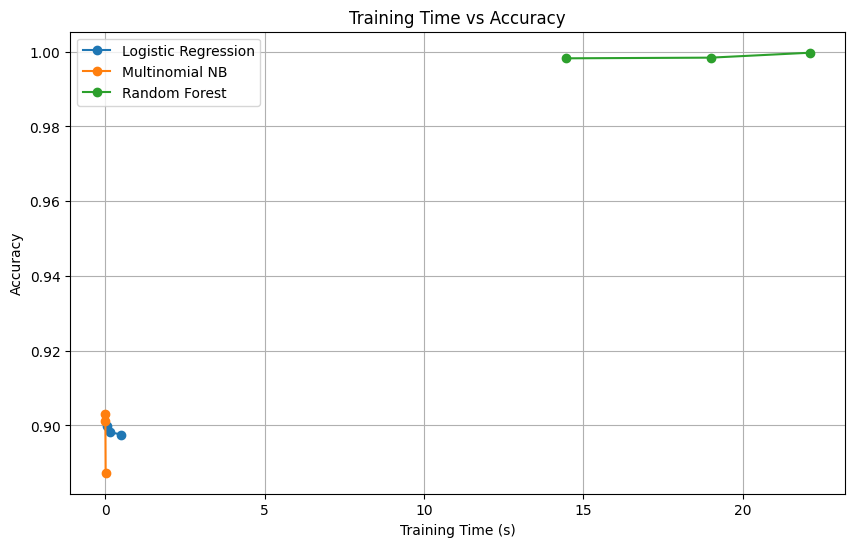

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
for model_name in models.keys():
    s=comparison_df[comparison_df['Model']==model_name]
    plt.plot(s['Training Time (s)'],s['Accuracy'],marker='o',label=model_name)
plt.xlabel('Training Time (s)')
plt.ylabel('Accuracy')
plt.title('Training Time vs Accuracy')
plt.legend()
plt.grid(True)
plt.show()